# Analyzing networks in Python

Activate anaconda and install packages    
`conda install -c anaconda networkx`  
`conda install pandas`  
`conda install matplotlib`

In [6]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import urllib, json

## Loading a Network
### House Graph example
https://networkx.org/documentation/stable/auto_examples/drawing/plot_house_with_colors.html

In [7]:
HG = nx.house_graph()

In [8]:
## Nodes
HG.nodes()

NodeView((0, 1, 2, 3, 4))

In [9]:
## Edges
HG.edges()

EdgeView([(0, 1), (0, 2), (1, 3), (2, 3), (2, 4), (3, 4)])

### Visualization example
https://networkx.org/documentation/stable/auto_examples/drawing/plot_house_with_colors.html

(-0.10500000000000001, 1.105, -0.21000000000000002, 2.21)

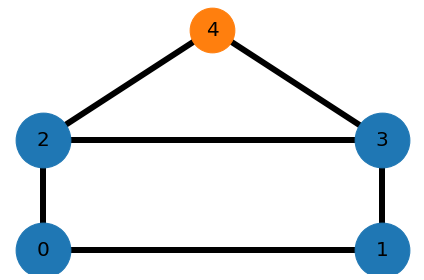

In [13]:
pos = {0: (0, 0), 1: (1, 0), 2: (0, 1), 3: (1, 1), 4: (0.5, 2.0)}
nx.draw_networkx_nodes(
    HG, pos, node_size=3000, nodelist=[0, 1, 2, 3], node_color="tab:blue"
)
nx.draw_networkx_nodes(HG, pos, node_size=2000, nodelist=[4], node_color="tab:orange")
nx.draw_networkx_edges(HG, pos, alpha=1, width=6)
nx.draw_networkx_labels(HG, pos, font_size=20)

plt.tight_layout()
plt.axis("off")

# Types of Edge Representation

### Edge List

In [14]:
list( HG.edges() )

[(0, 1), (0, 2), (1, 3), (2, 3), (2, 4), (3, 4)]

### Adjacency Matrix

In [15]:
ADJ = nx.to_pandas_adjacency(HG)
ADJ

,0,1,2,3,4
0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,1.0
3,0.0,1.0,1.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0


### Node-edge list

In [16]:
nx.to_dict_of_lists(HG)

{0: [1, 2], 1: [0, 3], 2: [0, 3, 4], 3: [1, 2, 4], 4: [2, 3]}

## Metrics

### Degree | How many friends do you have?

In [17]:
## Find degree of 
deg_0 = nx.degree(HG, 0) 
deg_3 = nx.degree(HG, 3)
deg_0, deg_3

(2, 3)

In [19]:
for neighbor in nx.neighbors(HG,3):
    print(neighbor)

1
2
4


### Density | Network-level measure

In [20]:
nx.density(HG)

0.6

https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.density.html

#### Does a path exist

In [21]:
nx.is_path(HG,[0,4]), nx.is_path(HG,[0,2,4])

(False, True)

In [22]:
nx.shortest_path(HG,0,4)

[0, 2, 4]

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality

In [23]:
nx.betweenness_centrality(HG, normalized=False)

{0: 0.5, 1: 0.5, 2: 1.5, 3: 1.5, 4: 0.0}

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality  
https://en.wikipedia.org/wiki/Betweenness_centrality

In [24]:
nx.degree_centrality(HG)

{0: 0.5, 1: 0.5, 2: 0.75, 3: 0.75, 4: 0.5}

________________________________________________

### Les Mis Graph

In [25]:
lemis_url = 'https://raw.githubusercontent.com/plotly/datasets/master/miserables.json'
with urllib.request.urlopen(lemis_url) as url:
    raw_data = json.loads(url.read().decode())

In [34]:
nodelist = raw_data['nodes']
nodelist = [a["name"] for a in nodelist]
# nodelist

In [38]:
edgelist = raw_data['links']
edgelist = [(a["source"], a["target"]) for a in edgelist]


### Create a graph
https://networkx.org/documentation/networkx-1.0/tutorial/tutorial.html

In [39]:
LM_G = nx.Graph()
# LM_G.add_nodes_from(nodelist)
LM_G.add_edges_from(edgelist)

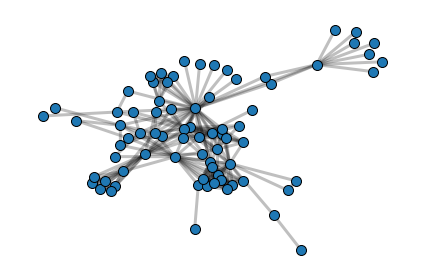

In [40]:
ax = plt.subplots()

pos = nx.spring_layout(LM_G, seed=200)
nx.draw_networkx_edges(LM_G, pos, alpha=0.25, width=3)
nx.draw_networkx_nodes(LM_G, pos, node_size=100).set_edgecolor('black')

plt.tight_layout()
plt.axis("off")
plt.show()

In [41]:
df = pd.DataFrame( nx.degree(LM_G) )

DegreeView({0: 2, 1: 2, 2: 3, 3: 3, 4: 2})